In [24]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import os

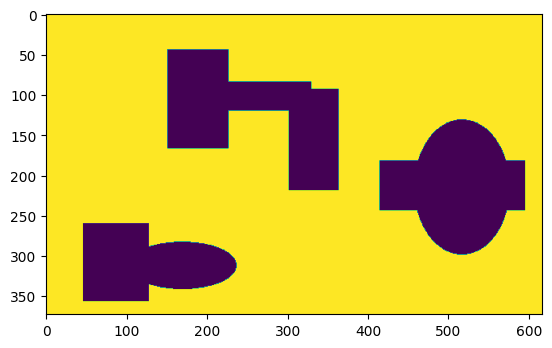

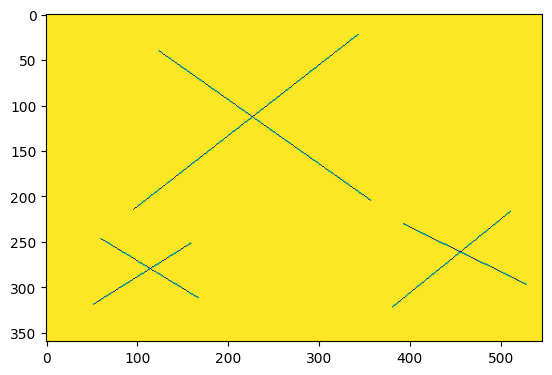

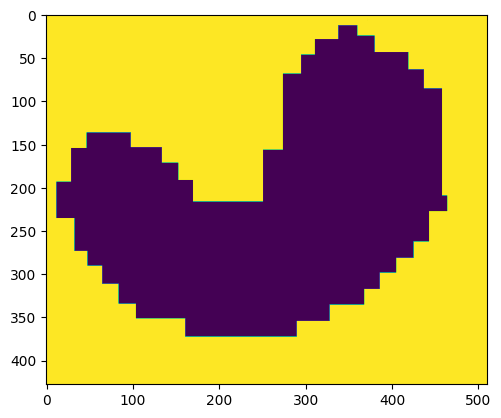

In [25]:
images = [cv2.imread(path, 0) for path in os.listdir() if path.endswith('png')]
for image in images:
    cv2.cvtColor(image , cv2.COLOR_GRAY2BGR)
    plt.imshow(image)
    plt.show()

In [26]:
def getSeedPoints(image):
  seed_points = []
  h, w = image.shape
  segmented = np.zeros((h, w, 3))
  threshold = 0
  k = 0
  for i in range (h):
    for j in range(w):
      if (segmented[i, j] == 0).all() and image[i, j].all() == threshold:
        seed = (i,j)
        k = k+1
        seed_points.append(seed)
  return seed_points


def region_growing(image, seed, SEG_IMG, type='4C'):
    c4 = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    c8 = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]
    neighbors = c4 if type == '4C' else c8
    
    height, width = image.shape
    color = (0, 255, 0)
    queue = []
    queue.append(seed)
    while queue:
        px = queue.pop(0)
        for neighbor in neighbors:
            x, y = px[0] + neighbor[0], px[1] + neighbor[1]
            if 0 <= x < height and 0 <= y < width:
                if (SEG_IMG[x, y] == [0, 0, 0]).all() and image[x, y] == image[px]:
                    SEG_IMG[x, y] = color
                    queue.append((x, y))

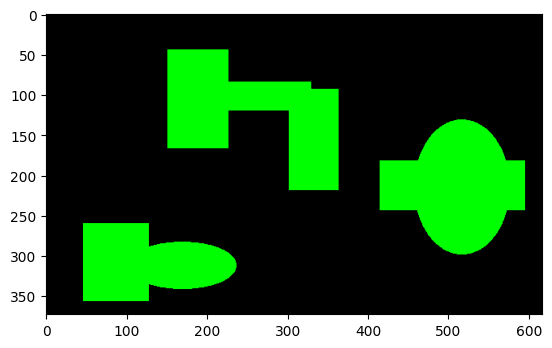

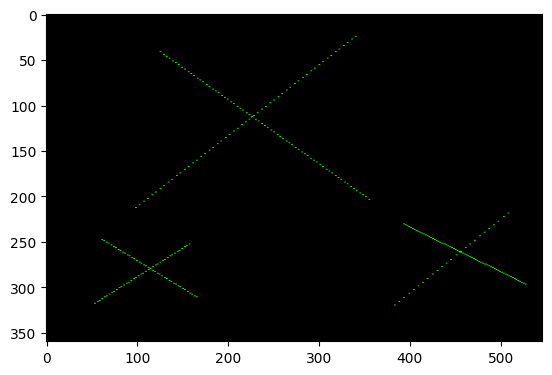

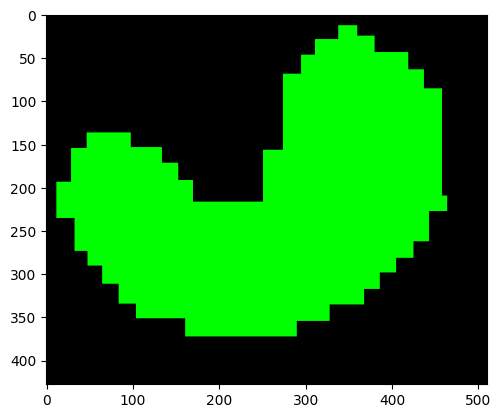

exec time is 23.514014720916748


In [27]:
import time
st = time.time()
for image in images:
  SEG_IMG = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
  for seed_point in getSeedPoints(image):
    region_growing(image, seed_point, SEG_IMG, '4C')
  plt.imshow(SEG_IMG)
  plt.show()
print(f'exec time is {time.time() - st}')

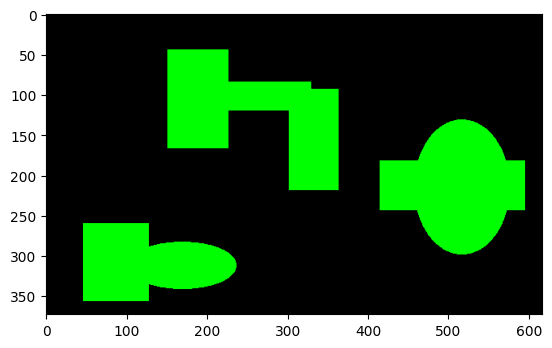

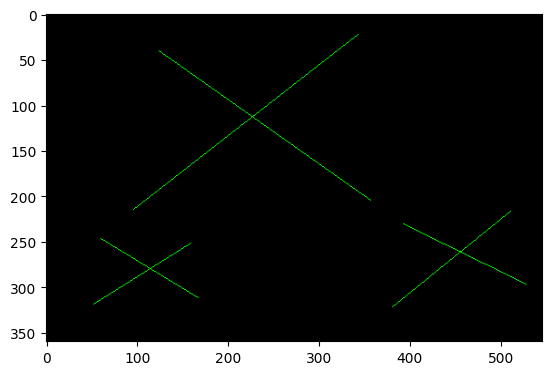

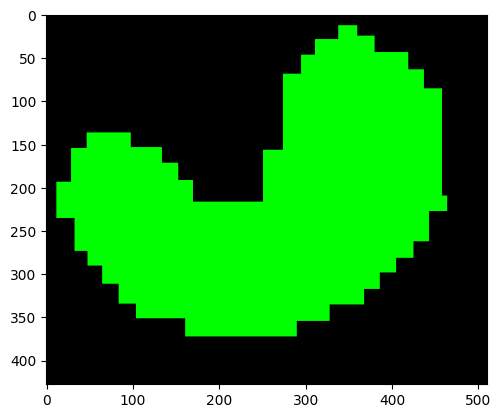

exec time is 32.91222429275513


In [28]:
st = time.time()
for image in images:
  SEG_IMG = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
  for seed_point in getSeedPoints(image):
    region_growing(image, seed_point, SEG_IMG, '8C')
  plt.imshow(SEG_IMG)
  plt.show()
print(f'exec time is {time.time() - st}')